

# Random Walks

Suppose that we have a very large network, and we'd like to explore it. Perhaps we don't even have access to all the edges. This is a common situation in data collection. A webscraper for gathering data, for example, doesn't have access to the entire network of webpages to be scraped; usually it has access to *one page at a time* and the links it contains. At each stage, the webscraper needs to follow a link in order to get the next piece of information.

There are many ways to explore a network, but the most fundamental one is the *simple random walk*. We'll discuss the simple random walk, highlight some of its core properties, and connect it to some ideas that we've already seen. Then, we'll introduce the *teleporting random walk*, which is the foundation of the internet-changing PageRank algorithm originally used by Google. Finally, we'll take another look network navigation and the small-world phenomenon.

## The Simple Random Walk {#sec-srw}

The simple random walk is easier to describe in English than it is to formulate mathematically. In intuitive terms, we imagine a walker who starts at some node $i$ in the graph. The walker then picks one of the neighbors $j$ of $i$ uniformly at random, and moves to $j$. Then, the walker picks one of the neighbors $k$ of $j$ uniformly at random, and moves to $k$, and so on.

::: {.callout-note}
::: {#def-simple-random-walk}

## Simple Random Walk (SRW)

A **simple random walk** on a graph $G$ with adjacency matrix $\mathbf{A}\in \mathbb{R}^{n\times n}$ is a countable sequence of random variables $X_1,\ldots,X_t,\ldots$ which take values in the node set $N$ of $G$. We have
$$
\begin{aligned}
\mathbb{P}(X_{t+1} = i | X_t = j_t, X_{t-1} = j_{t-1},\ldots,X_{1} = j_1) &=  \mathbb{P}(X_{t+1} = i | X_t = j_t) \\
&= \begin{cases}
        \frac{1}{k_j} &\quad j \text{ is connected to } i \\
        0 &\quad \text{otherwise.}
    \end{cases} \\
    &= \frac{a_{ij}}{k_j}\;.
\end{aligned}
$$
:::
:::

In @def-simple-random-walk, the first equality is the *[Markov property](https://en.wikipedia.org/wiki/Markov_property)*: the future state of the random walk depends only on where it is right now (i.e. the value of $X_t$), not where it's been previously. The second and third equalities give mathematical structure to the idea of "picking a node connected to $j$ uniformly at random."

::: {.callout-note}
::: {#def-transition-matrix}

## Transition Matrix of a SRW

The **transition matrix** of a simple random walk on a connected graph $G$ with adjacency matrix $\mathbf{A}$ is $\mathbf{P} = \mathbf{A}\mathbf{D}^{-1}$. Its entries are $p_{ij} = a_{ij}/k_j$, where $k_j$ is the degree of node $j$ and $\mathbf{D}$ is the diagonal matrix whose $jj$th entry is $k_j$.
:::
:::

::: {.callout-caution}
***Exercise***: Let $p_{ij}$ denote the entries of $\mathbf{P}$. Check that
$\sum_{i \in N} p_{ij} = 1$, and interpret this fact. We say a matrix with this property is **(column) stochastic**.
:::

::: {.hide .solution}

 As defined, $p_{ij} = \frac{a_{ij}}{k_j}$. Thus, $\sum_i p_{ij} = \sum_i \frac{a_{ij}}{k_j} = \frac{1}{k_j}\sum_i a_{ij} = \frac{k_j}{k_j} = 1$.

:::

What does the transition matrix do? Well, we can use the law of total probability to write:
$$
\begin{aligned}
\mathbb{P}(X_{t+1} = i) &= \sum_{j \in N}\mathbb{P}(X_{t+1} = i|X_{t} = j)\mathbb{P}(X_t = j) \\
&= \sum_{j \in N}p_{ij}\mathbb{P}(X_t = j)\;.
\end{aligned}
$$

Let $\mathbf{q}(t)$ be the vector with entries $q_i(t) = \mathbb{P}(X_{t} = i)$. We have just shown the most important relation in the study of random walks and their generalizations, Markov chains:

:::{.callout-tip}
$$
\mathbf{q}(t+1) = \mathbf{P}\mathbf{q}(t)
$${#eq-transition}
:::

@eq-transition has an immediate consequence: $\mathbf{q}(t) = \mathbf{P}^{t}\mathbf{q}(0)$. So, if we know the *initial distribution* $\mathbf{q}(0)$ describing the location at which the walker begins, we can get all other information we need from the matrix $\mathbf{P}$ and its powers.

### Stationary Distribution: Existence and Uniqueness

Throughout this section, we assume that the graph $G$ is connected.

:::{.callout-note}
We say that an SRW has a *stationary distribution* $\pi \in \mathbb{R}^n$ if $\lim_{t\rightarrow \infty} \mathbf{q}(t) = \mathbf{\pi}$, *regardless of the initial distribution* $\mathbf{q}(0)$.
:::

:::{.callout-note}
:::{#def-periodic}

A graph is *aperiodic* if the greatest common divisor of lengths of its cycles is 1. A graph is *periodic* if it is not aperiodic.
:::
:::

A simple example of a periodic graph is a $k$-cycle.
A less simple example is a *bipartite graph*, in which each node can be separated into one of two classes $S_1$ and $S_2$ such that nodes in $S_1$ only connect to nodes in $S_2$ (and not to any other nodes in $S_1$).
You can check that bipartiteness implies that every cycle has length divisible by 2, so the graph is periodic.

:::{.callout-tip}
:::{#thm-stationary}
Suppose that $G$ is connected and aperiodic. Then,

- $G$ has a stationary distribution $\pi$.
- This stationary distribution is unique.
- The stationary distribution is the unique eigenvector of the transition matrix $\mathbf{P}$ with eigenvalue $1$.
:::
:::

@thm-stationary is actually a theorem about discrete-time finite-state Markov chains in general, and its full proof is beyond the scope of this course. Here's a sketch:

1. The condition that $G$ is connected implies that the matrix $\mathbf{P}$ is [irreducible](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem#Classification_of_matrices).
2. This allows us to apply the [Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron–Frobenius_theorem) to conclude that $\mathbf{P}$ has a unique eigenvector with strictly positive entries, which we'll call ${\bf \pi}$. Since $\mathbf{P}$ is column stochastic, a direct calculation shows that the corresponding eigenvalue of ${\bf \pi}$ is 1, and we have $\pi = \mathbf{P}\pi$.
3. One further shows that $\lim_{t \rightarrow \infty}\mathbf{P}^t$ exists and that its rows become equal to the eigenvector $\pi$ (this is related to power iteration).
4. Because each row of limiting matrix describe the long-run behavior of the random walk from a given starting node, one infers that $\pi$ is indeed a stationary state. Because all the rows agree in the limit, one infers that $\pi$ is the only such stationary state.

### Stationary Distribution: Structure

We know from @thm-stationary that there is a unique stationary distribution for the simple random walk, and that this distribution describes, in the long-term, the amount of time that the walker spends on a node. What actually *is* the stationary distribution? For many Markov chains, including more complicated random walks, it can be difficult to describe the stationary distribution exactly. In this case the answer is surprisingly simple, although it's one of those things that's much easier to check than it is to find in the first place.

:::{.callout-note}
:::{#thm-degree}
## Stationary Distribution of an SRW

The stationary distribution of an SRW is $\pi = \frac{1}{2m}\mathbf{k}$, where $\mathbf{k}$ is the vector of node degrees.
:::
:::

:::{.proof}
We can do a direct calculation:

$$
\begin{aligned}
\mathbf{P}\pi = \mathbf{A}\mathbf{D}^{-1}\left(\frac{1}{2m}\mathbf{k}\right) = \frac{1}{2m}\mathbf{A}\mathbf{1}
= \frac{1}{2m}\mathbf{k}
= \pi\;.
\end{aligned}
$$

For the second equality we have used the quickly-checked identity $\mathbf{D}^{-1}\mathbf{k} = \mathbf{1}$, while for the third we have used the formula $\mathbf{k} = \mathbf{A}\mathbf{1}$.
:::

So, for simple random walks, $\mathbb{P}(X_t = i)$ when $t$ is large is approximately $k_i/2m$, proportional to the degree of node $i$. The intuition here is that the amount of time I spend in state is directly proportional to the number of ways that I can enter that state.

## Exploration and Ranking: PageRank

PageRank is the algorithm that originally made Google a dominant player in the domain of web search.[@brin1998anatomy]{.aside} The idea of PageRank is again to explore the graph using a random exploration process. The underlying process is closely related to the simple random walk that we described earlier. However, there are two important differences.

1. First, PageRank works on *directed* graphs. This matches the original application area; the web can be viewed as a *directed* network of links between pages. The reason directedness is so important is that, if $i \rightarrow j$ ($i$ links to $j$), it doesn't follow that $j\rightarrow i$. Capturing these kinds of asymmetric relationships is very important for reasonable ranking procedures.
2. Unlike the SRW, PageRank is able to explore graphs that are non-ergodic.

So, suppose we have a *directed* graph with adjacency matrix $\mathbf{A}$. The important thing to remember is that now $\mathbf{A}$ is not required to be symmetric. We interpret the entries of the adjacency matrix so that $a_{ij} = 1$ if $j \rightarrow i$. Since $\mathbf{A}$ need not be symmetric, $a_{ij} \neq a_{ji}$ in general.

The definition of a random walk on a directed graph is very similar to the definition on an undirected graph. It is again a sequence of random variables with the Markov property; only the transition probabilities differ.

:::{.callout-note}
:::{#def-directed-SRW}

## Simple Random Walk on a Directed Graph

The SRW on a directed graph has transition probabilities
$$
\mathbb{P}(X_{t+1} = i | X_t = j) = \frac{a_{ij}}{k_j^{\mathrm{out}}}\;,
$$
where $k_j^{\mathrm{out}} = \sum_{i \in N}a_{ij}$ is the number of outgoing links from node $j$. The transition matrix of this walk is
$$
\mathbf{P} = \mathbf{A}(\mathbf{D}^{\mathrm{out}})^{-1}\;.
$$
:::
:::

:::{.callout-caution}
Because $\mathbf{A}$ is not symmetric, we can also define $k_i^{\mathrm{in}} = \sum_{j \in N}a_{ij}$, the number of incoming links to node $j$. Importantly, $k_i^{\mathrm{in}} \neq k_i^{\mathrm{out}}$ in general.
:::

Many of the same considerations from the undirected setting carry over to the directed setting.

:::{.callout-tip}
:::{#thm-stationary-directed}

## Stationary Distributions of Directed Random Walks

Suppose that:

1. There exists some integer power $t > 0$ such that every entry of $\mathbf{A}^t$ is positive.
2. The greatest common divisor of the *directed* cycles in $G$ is 1.

Then, the SRW on $G$ has a stationary distribution $\pi$, which is a solution of the eigenproblem
$$
\pi = \mathbf{P}\pi\;.
$$
:::
:::

Condition (1) in @thm-stationary-directed is essentially a connectedness condition: it says that there has to be a directed path from every node to every other node in the network. So, as you might reasonably expect, the directed random walk doesn't really overcome the need for the graph to be connected. This can be a problem for network exploration, as it's more common for directed networks to not be connected in this way.[A bit more subtly, directed graphs that are *almost* disconnected are subject to *slow mixing* of the random walk, which implies very inefficient exploration of the network.] PageRank overcomes this limitation by allowing the walker to randomly hop to new nodes, independent of the network structure.

:::{.callout-note}
:::{#def-pagerank-walk}

## PageRank Random Walk

The **PageRank random walk** has two parameters:

- The *teleportation vector* $\mathbf{v} \in \mathbb{R}^n_+$, which we assume to satisfy $\sum_{i\in N}v_i = 1$.
- The *teleportation rate* $\alpha\in [0,1]$.

This walk has transition probabilities
$$
\mathbb{P}(X_{t+1} = i|X_{t}=j) = (1-\alpha)\frac{a_{ij}}{k_j^{\mathrm{out}}} + \alpha v_i\;.
$${#eq-pagerank-transition}

Its transition matrix is

$$
\mathbf{P} = (1-\alpha) \mathbf{A}(\mathbf{D}^{\mathrm{out}})^{-1} + \alpha \mathbf{V}\;,
$$

$$
\mathbf{V} = \left[\begin{matrix}
    | & | & \cdots & | \\
    \mathbf{v} & \mathbf{v} & \cdots & \mathbf{v} \\
    | & | & \cdots & |
\end{matrix}\right]\;.
$$

:::
:::

Here's the intuitive way to think about this walk. At each time step, the walker flips a weighted coin with probability of heads equal to $\alpha$.

- If heads, the walker chooses to sample from the probability distribution encoded by $\mathbf{v}$. That is, the walker chooses from among all the nodes in $N$, and picks node $i$ with probability $v_i$.
- If tails, the walker instead follows a link, just like in the directed random walk.

This is why there are two terms in the transition probability in @eq-pagerank-transition. The first term corresponds to the "tails" scenario in which the walker does a step corresponding to the directed random walk, while the second term corresponds to teleportation.

The standard choice of the teleportation vector is $\mathbf{v} = \frac{1}{n}\mathbf{1}$, so each node has an equal probability of being chosen for teleportation. However, it's also possible to take other approaches, as we'll see in a moment.

:::{.callout-note}
:::{#thm-pagerank}

## Stationary Distribution of PageRank

Suppose that there exists an integer power $t$ such that $\mathbf{P}^t$ has all entries strictly positive. Then, the PageRank random walk has a unique stationary distribution, and this distribution may again be found by solving $\pi = \mathbf{P}\pi$.
:::
:::

:::{.callout-caution}
**Exercise**: Show that, when $\mathbf{v} = \frac{1}{n}\mathbf{1}$, @thm-pagerank implies that the PageRank walk always has a stationary distribution, regardless of the graph.
:::

:::{.callout-caution}
**Challenge**: Give a necessary and sufficient condition in terms of $\mathbf{A}$ and $\mathbf{v}$ for PageRank to have a stationary distribution.
:::


### Implementation

Let's code up a quick example to visualize PageRank. We'll use the Hamilton Mentions graph:

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

df = pd.read_csv("https://philchodrow.github.io/PIC16A/homework/HW3-hamilton-data.csv",
names = ["mentioner", "mentioned"])

df = df[df["mentioner"] != df["mentioned"]]

G = nx.from_pandas_edgelist(df,
                            source = "mentioner",
                            target = "mentioned",
                            edge_attr=None,
                            create_using=nx.DiGraph())

There are a few nodes in this network with no outgoing edges. while there are modifications we can make to handle this kind of case, we can also just remove them from the graph.

In [2]:
for i in range(2):
    G = G.subgraph([name for name, val in G.out_degree() if val > 0])

Now we can write our PageRank function. We'll compute the transition matrix $\mathbf{P}$ and find its leading eigenvector.

In [3]:
def pagerank(G, v, alpha = 0.15):

    assert np.isclose(v.sum(), 1.0)

    # construct the PR transition matrix
    A  = nx.to_numpy_array(G).T
    K  = np.diag(A.sum(axis = 0))     # K^out
    P_ = A@np.linalg.inv(K)           # random walk matrix
    V  = np.outer(v, np.ones(len(v))) # teleportation matrix
    P = (1-alpha)*P_ + alpha*V        # overall transition matrix

    # grab the eigenvector with eigenvalue 1, normalize it and return.
    eigs = np.linalg.eig(P)
    pi = eigs[1][:,np.isclose(eigs[0], 1.0)]
    pi = np.abs(pi) / np.abs(pi).sum()
    return pi

In [4]:
def draw_pagerank(G, v,  layout, alpha = 0.15):

    pi = pagerank(G, v, alpha = alpha)
    nx.draw(G, layout,
            node_size = 5000*pi,
            with_labels = True,
            edge_color = "lightgray",
            node_color = "lavender",
            edgecolors  = "darkgray")

Now we can visualize the PageRank stationary distribution for different choices of the teleportation vector $\mathbf{v}$ and the teleportation rate $\alpha$:

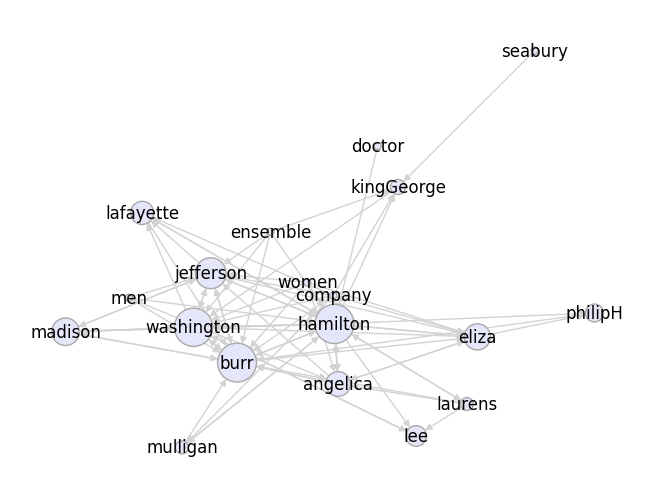

In [5]:
layout = nx.fruchterman_reingold_layout(G)

n = len(G.nodes())
v = 1/n*np.ones(n)
draw_pagerank(G, v, layout, alpha = 0.1)

## Seeded PageRank

A useful feature of the way we've defined PageRank is that we can choose different teleportation vectors $\mathbf{v}$ in order to explore different parts of the graph. For example, suppose that we are especially interested in the part of the network surrouding certain characters. We can just change the teleportation vector $\mathbf{v}$ to highlight those specific characters. This approach is often called "personalized" or "seeded" PageRank.

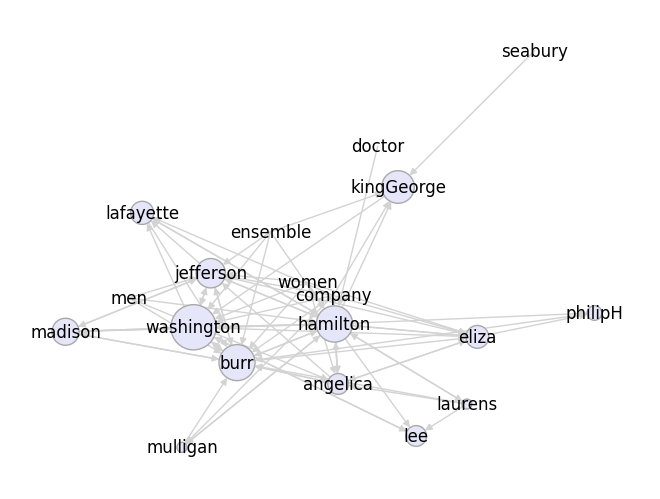

In [6]:
v = np.array([1 if i == "kingGeorge" else 0 for i in list(G.nodes())])
draw_pagerank(G, v, layout, alpha = 0.1)

This time, we've highlighted the node corresponding to the character King George. Whereas when using the "basic" version of PageRank Hamilton, Burr, Washington, and Jefferson are all very important characters, in the personalized versio, Washington emerges as clearly the most important.

This kind of idea is often applied in marketing and search. Suppose we know that a user is interested in site $A$. Then, if that user searches for something online, we can use that information by computing a PageRank ranking and returning the top nodes, *using a biased teleportation vector*. This would allow us to balance the objectives of returning webpages that are relevant *overall* and webpages that are especially relevant *for that user*.
